In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/beers.csv')

# Analise de Dados

Realizarei uma pequena análise dos dados para verificar tipos de features, em qual escala as features estão e assim decidir quais features serão utilizadas e quais transformações serão necessárias para prever o **ibu**. Nesta analise desconsiderei o **Id** que é a várivel identificadora, pois não terá uma relevancia importante no treinamento do modelo.


In [3]:
df.head()

,id,name,abv,ibu,target_fg,target_og,ebc,srm,ph
0,1,Buzz,4.5,60.0,1010.0,1044.0,20.0,10.0,4.4
1,2,Trashy Blonde,4.1,41.5,1010.0,1041.7,15.0,15.0,4.4
2,3,Berliner Weisse With Yuzu - B-Sides,4.2,8.0,1007.0,1040.0,8.0,4.0,3.2
3,4,Pilsen Lager,6.3,55.0,1012.0,1060.0,30.0,15.0,4.4
4,5,Avery Brown Dredge,7.2,59.0,1027.0,1069.0,10.0,5.0,4.4


### DataFrame

In [4]:
print("Quantidade de linhas do DataFrame", df.shape[0])
print("Quantidade de colunas do DataFrame", df.shape[1])

Quantidade de linhas do DataFrame 325
Quantidade de colunas do DataFrame 9


O DataFrame contém uma váriavel categorica(**name**) e a o restante são váriaveis númericas.

In [5]:
df.dtypes

id             int64
name          object
abv          float64
ibu          float64
target_fg    float64
target_og    float64
ebc          float64
srm          float64
ph           float64
dtype: object

O DataFrame possui algumas colunas com valores faltantes: **ibu**, **target_fg**, **target_og**, **ebc**, **srm** e **ph**.

In [6]:
df.isna().sum()

id           0
name         0
abv          0
ibu          5
target_fg    1
target_og    1
ebc          6
srm          6
ph           2
dtype: int64

### Váriaveis Categóricas

#### Name

In [7]:
df['name'].head(10)

0                                   Buzz
1                          Trashy Blonde
2    Berliner Weisse With Yuzu - B-Sides
3                           Pilsen Lager
4                     Avery Brown Dredge
5                         Electric India
6                                  AB:12
7                             Fake Lager
8                                  AB:07
9                             Bramling X
Name: name, dtype: object

Como podemos perceber é dificil encontrar um padrão no texto que nos ajude a criar um nova feature, talvez uma feature que represente cervejas da mesma "marca" ou "fabricante" de um bom resultado. Porém avaliando o esforço, acredito que não seja o momento para a criação desta feature, mas é uma ideia muito interessante para deixar em backlog.

### Váriaveis Númericas

#### ABV

In [8]:
df['abv'].head()

0    4.5
1    4.1
2    4.2
3    6.3
4    7.2
Name: abv, dtype: float64

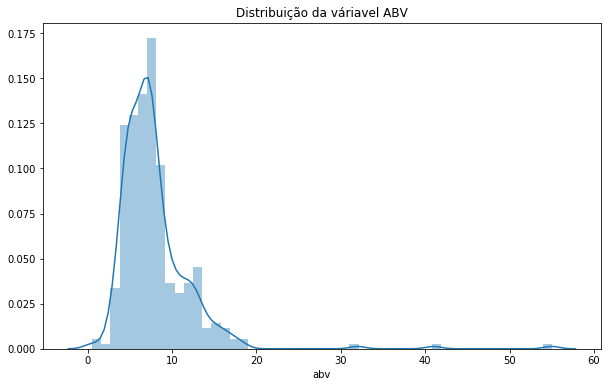

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['abv'])
plt.title("Distribuição da váriavel ABV")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 0 e 20, porém existem alguns **outliers**.

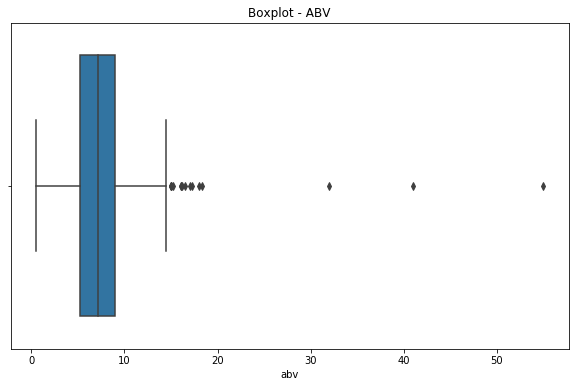

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(df['abv'])
plt.title("Boxplot - ABV")
plt.show()

Podemos confirmar a existência dos **outliers** com o boxplot.

#### Target FG

In [11]:
df_target_fg_no_null = df['target_fg'].dropna()

In [12]:
df_target_fg_no_null.head()

0    1010.0
1    1010.0
2    1007.0
3    1012.0
4    1027.0
Name: target_fg, dtype: float64

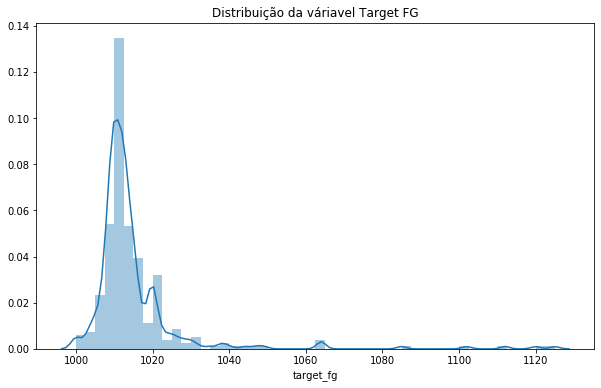

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df_target_fg_no_null)
plt.title("Distribuição da váriavel Target FG")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 1000 e 1040, porém existem alguns **outliers**.

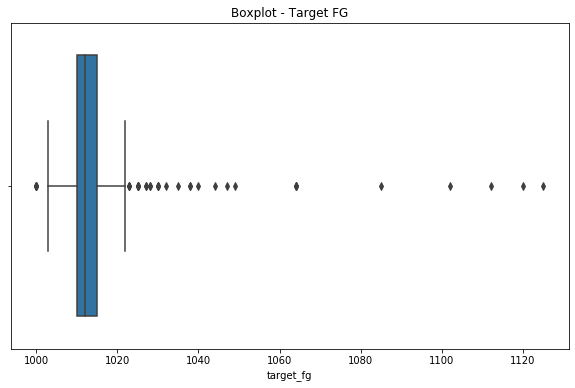

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df_target_fg_no_null)
plt.title("Boxplot - Target FG")
plt.show()

Podemos confirmar a existência dos **outliers** com o boxplot.

#### Target OG

In [15]:
df_target_og_no_null = df['target_og'].dropna()

In [16]:
df_target_og_no_null.head()

0    1044.0
1    1041.7
2    1040.0
3    1060.0
4    1069.0
Name: target_og, dtype: float64

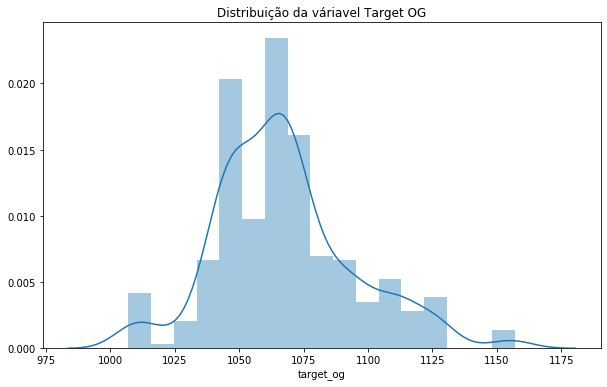

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df_target_og_no_null)
plt.title("Distribuição da váriavel Target OG")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 1000 e 1175, parece que não há existência de **outliers**.

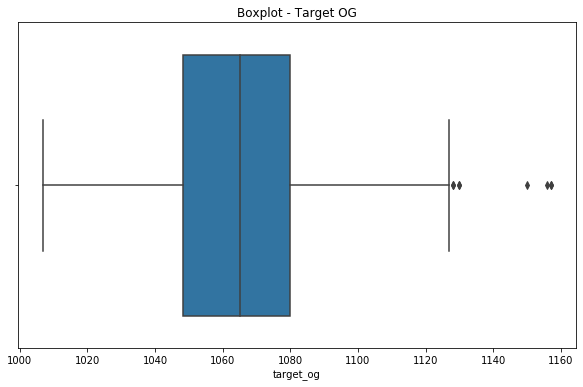

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df_target_og_no_null)
plt.title("Boxplot - Target OG")
plt.show()

Podemos confirmar a existência de alguns outliers com o boxplot, porém bem poucos.

#### EBC

In [19]:
df_ebc_no_null = df['ebc'].dropna()

In [20]:
df_ebc_no_null.head()

0    20.0
1    15.0
2     8.0
3    30.0
4    10.0
Name: ebc, dtype: float64

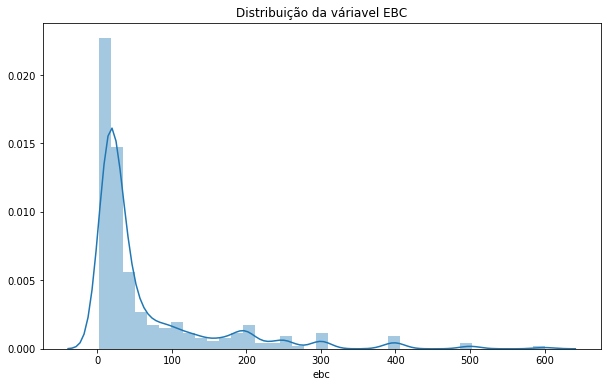

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df_ebc_no_null)
plt.title("Distribuição da váriavel EBC")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 0 e 100, mas parece que há a existência de **outliers**.

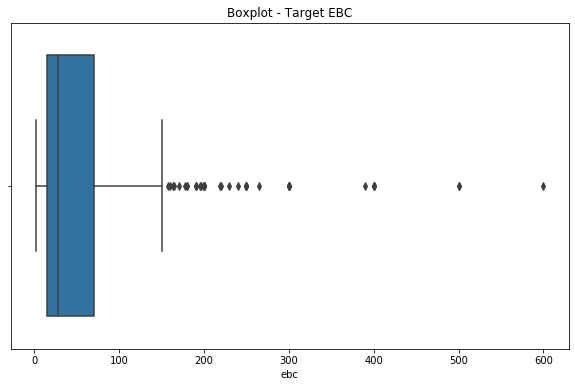

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(df_ebc_no_null)
plt.title("Boxplot - Target EBC")
plt.show()

Podemos confirmar a existência dos **outliers** com o boxplot.

#### SRM

In [23]:
df_srm_no_null = df['srm'].dropna()

In [24]:
df_srm_no_null.head()

0    10.0
1    15.0
2     4.0
3    15.0
4     5.0
Name: srm, dtype: float64

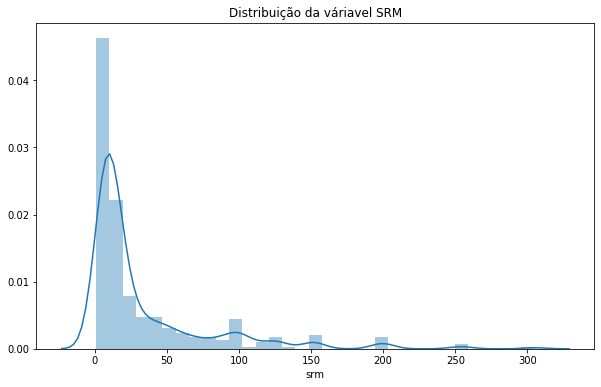

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df_srm_no_null)
plt.title("Distribuição da váriavel SRM")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 0 e 50, mas parece que há a existência de **outliers**.

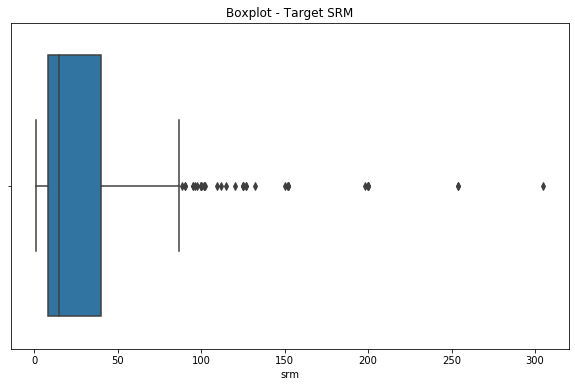

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(df_srm_no_null)
plt.title("Boxplot - Target SRM")
plt.show()

Podemos confirmar a existência dos **outliers** com o boxplot.

#### PH

In [27]:
df_ph_no_null = df['ph'].dropna()

In [28]:
df_ph_no_null.head()

0    4.4
1    4.4
2    3.2
3    4.4
4    4.4
Name: ph, dtype: float64

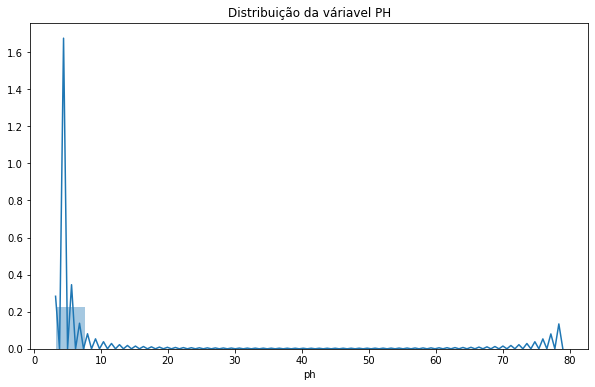

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(df_ph_no_null)
plt.title("Distribuição da váriavel PH")
plt.show()

Podemos perceber que existe uma concentração bem grande dos dados entre 0 e 7, mas parece que há a existência de **outliers**.

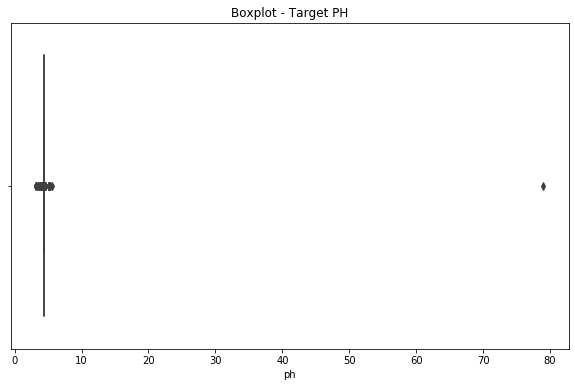

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(df_ph_no_null)
plt.title("Boxplot - Target PH")
plt.show()

Podemos confirmar a existência dos **outliers** com o boxplot.

## Conclusão

Os dados possuem alguns valores faltantes, e apresentam alguns valores discrepantes em algumas váriveis, com isso a váriáveis que iremos utilizar para o treinamento do modelo são: **abv**, **target_f**, **target_o**, **ebc**, **srm**, **ph**.    